In [103]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, \
    precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [104]:
# Testing packages 
import ipytest 
import pytest
import doctest
from unittest.mock import patch 
# Configure pytest
ipytest.autoconfig()

In [105]:
cwd = os.getcwd()
AUDIO_FILE = os.path.abspath("..\\Datasets\\Data\\A2.wav")
signal, sr = librosa.load(AUDIO_FILE)
signal_nom = librosa.util.normalize(signal)
mfcc = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
spectrogram = librosa.feature.melspectrogram(signal)
spectrogram = librosa.power_to_db(spectrogram)

c:\Users\Stephen\.virtualenvs\Automatic-Music-Transcription-yc1OTF3l\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
c:\Users\Stephen\.virtualenvs\Automatic-Music-Transcription-yc1OTF3l\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


In [106]:
# signal_db = librosa.amplitude_to_db(signal)
def plot_wave(audio_path:str, normalize=False, font_size=10):
    """Plots a wave plot of audio file 

    Args:
        audio_path (str): path to audio file 
        normalize (bool, optional): normalize the audio. Defaults to False.
        font_size (int, optional): font size for the graph. Defaults to 10.
    """
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    else:
        librosa.display.waveshow(y=signal, sr=sr)
        plt.title("Waveform", fontsize = font_size, fontweight ='bold')
        plt.ylabel("Amplitude ")
        plt.xlabel("Time (s)")
        plt.show()

.                                                                                            [100%]
1 passed in 0.48s


<ExitCode.OK: 0>

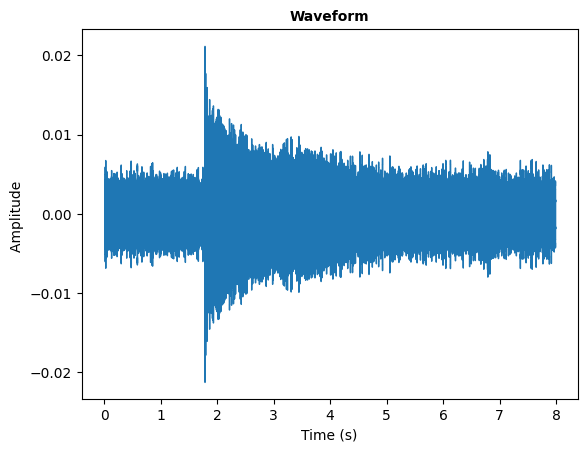

In [107]:
ipytest.clean_tests()  # Allows renaming tests

@patch("matplotlib.pyplot.show")
def test_plot_wave(mock_show):
    plot_wave(audio_path=AUDIO_FILE)

ipytest.run()

In [108]:
def plot_mfcc(audio_path:str, normalize=False, n_mfcc=13, bins=13, font_size=10):
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    mfcc = librosa.feature.mfcc(signal, n_mfcc=n_mfcc, sr=sr)
    librosa.display.specshow(mfcc, sr=sr, x_axis="time", y_axis="log", bins_per_octave=bins)
    plt.title("MFCC", fontsize = font_size, fontweight ='bold')
    plt.colorbar(format="%+2f")
    plt.ylabel("Mel Coefficients")
    plt.xlabel("Time (s)")
    plt.show()

.                                                                                            [100%]
======================================== warnings summary =========================================
tmpr0lmm27e.py::test_plot_wave
  c:\Users\Stephen\Documents\GitHub_Repositories\Automatic-Music-Transcription\src\LSTM\tmpr0lmm27e.py:6: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
    0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.48s


<ExitCode.OK: 0>

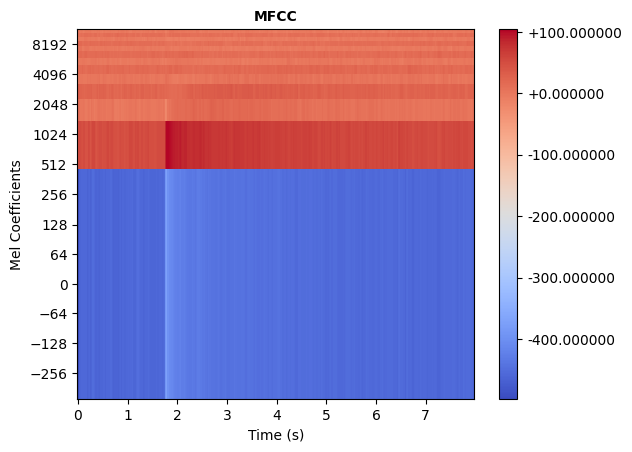

In [109]:
ipytest.clean_tests()  # Allows renaming tests

@patch("matplotlib.pyplot.show")
def test_plot_wave(mock_show):
    plot_mfcc(audio_path=AUDIO_FILE)

ipytest.run()

In [110]:
def plot_spectrogram(audio_path:str, normalize=False, bins=13, font_size=10):
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    spectrogram = librosa.feature.melspectrogram(signal)
    spectrogram = librosa.power_to_db(spectrogram)
    librosa.display.specshow(spectrogram, sr=sr, x_axis="time", y_axis="log", bins_per_octave=bins)
    plt.title("MFCC", fontsize = font_size, fontweight ='bold')
    plt.colorbar(format="%+2f")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.show()

.                                                                                            [100%]
======================================== warnings summary =========================================
tmpu68i3dpk.py::test_plot_wave
  c:\Users\Stephen\Documents\GitHub_Repositories\Automatic-Music-Transcription\src\LSTM\tmpu68i3dpk.py:6: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
    0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.47s


<ExitCode.OK: 0>

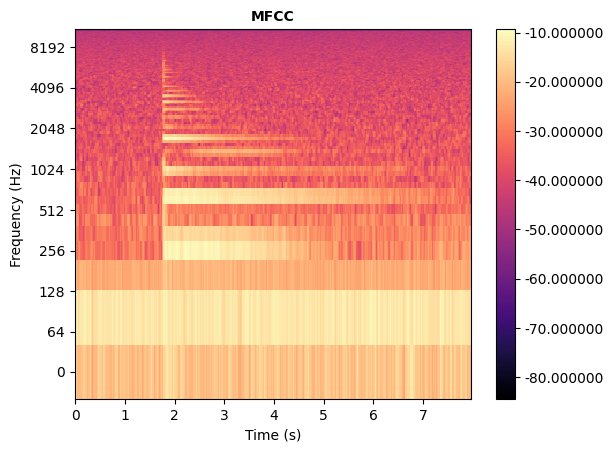

In [111]:
ipytest.clean_tests()  # Allows renaming tests

@patch("matplotlib.pyplot.show")
def test_plot_wave(mock_show):
    plot_spectrogram(audio_path=AUDIO_FILE)

ipytest.run()

# Building the model 

In [125]:
DATASET_PATH = os.path.abspath("..\Datasets\Dataset_JSON_Files\Simulated_Dataset_Matlab_12frets_1.json")
MODEL_PATH = os.path.abspath("..\LSTM\LSTM_Model_Files\LSTM_Model_Simulated_Dataset_Matlab_12frets_1.h5")
PLOT_TITLE = "Simulated_Dataset_Matlab_12frets_1"  # Dataset name to be used in graph titles
RESULTS_PATH = "LSTM_Results/"
MODEL_NAME = "Simulated_Dataset_Matlab_12frets_1"

# tweaking model
DROPOUT = 0
NUMBER_OF_NOTES = 37  # number of notes to classify
LEARNING_RATE = 0.0001
LOSS = "sparse_categorical_crossentropy"
BATCH_SIZE = 4
EPOCHS = 10

In [126]:
def get_nth_key(dictionary, n=0):
    if n < 0:
        n += len(dictionary)
    for i, key in enumerate(dictionary.keys()):
        if i == n:
            return key
    raise IndexError("dictionary index out of range")

In [127]:
def get_mappings(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    mapping = data["mapping"]
    return mapping

In [128]:
def load_data(dataset_path):
    """
    Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    #X = np.array(data["spectrogram"])
    y = np.array(data["labels"])
    return X, y

In [129]:
def plot_history(history, plt_title=""):
    """
    Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model

    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_xlabel("Epoch")
    axs[0].legend(loc="lower right")
    axs[0].set_title(plt_title + " Accuracy evaluation")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title(plt_title + " Error evaluation")

    plt.show()

In [130]:
def prepare_datasets(test_size, validation_size):
    """
    Loads data and splits it into train, validation and test sets.
        :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
        :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
        :return X_train (ndarray): Input training set
        :return X_validation (ndarray): Input validation set
        :return X_test (ndarray): Input test set
        :return y_train (ndarray): Target training set
        :return y_validation (ndarray): Target validation set
        :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATASET_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [131]:
def build_model(input_shape, num_notes, dropout=0.0):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    # return sequence to pass onto next layer
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))

    # dropout layer (mitigate overfitting)
    model.add(keras.layers.Dropout(dropout))

    # output layer
    model.add(keras.layers.Dense(num_notes, activation='softmax'))

    return model

In [132]:
#TODO complete function and docstring
def predict(model, X, y):
    """
        Predict on data
            :param model:
            :param X:
            :param y:
            :return: predicted_note
            :return: predicted_index
        """

    prediction = model.predict(X)  # [number of time bins, mfcc_coefficients]
    #print("prediction = {}".format(prediction))
    # extract index with max value
    predicted_index = np.argmax(prediction, axis=1)
    #print("Expected index: {}, Predicted index: {}".format(y, predicted_index))
    # predicted_note = get_nth_key(notes_to_frequency, predicted_index)
    # return predicted_index
    return predicted_index, prediction

In [133]:
LABELS = get_mappings(DATASET_PATH)

In [134]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [135]:
# Build LSTM
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13 [number of slices, mfcc coeffceints]

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = build_model(input_shape, NUMBER_OF_NOTES, DROPOUT)

In [136]:
 # compile model
optimiser = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimiser,
                loss=LOSS,
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 173, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 37)                2405      
Total params: 59,557
Trainable params: 59,557
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
222/222 [==============================] - 5s 21ms/step - loss: 3.6064 - accuracy: 0.0462 - val_loss: 3.5871 - val_accuracy: 0.0495
Epoch 2/10
222/222 [==============================] - 4s 17ms/step - loss: 3.5256 - accuracy: 0.0811 - val_loss: 3.4936 - val_accuracy: 0.0766
Epoch 3/10
222/222 [==============================] - 4s 17ms/step - loss: 3.3428 - accuracy: 0.1025 - val_loss: 3.2612 - val_accuracy: 0.1036
Epoch 4/10
222/222 [==============================] - 4s 17ms/step - loss: 3.0343 - accuracy: 0.1160 - val_loss: 2.9490 - val_accuracy: 0.0856
Epoch 5/10
222/222 [==============================] - 4s 17ms/step - loss: 2.7724 - accuracy: 0.1430 - val_loss: 2.7668 - val_accuracy: 0.1261
Epoch 6/10
222/222 [==============================] - 4s 17ms/step - loss: 2.5852 - accuracy: 0.1633 - val_loss: 2.5775 - val_accuracy: 0.1892
Epoch 7/10
222/222 [==============================] - 4s 17ms/step - loss: 2.4332 - accuracy: 0.2050 - val_loss: 2.4833 - val_accuracy: 0.1486

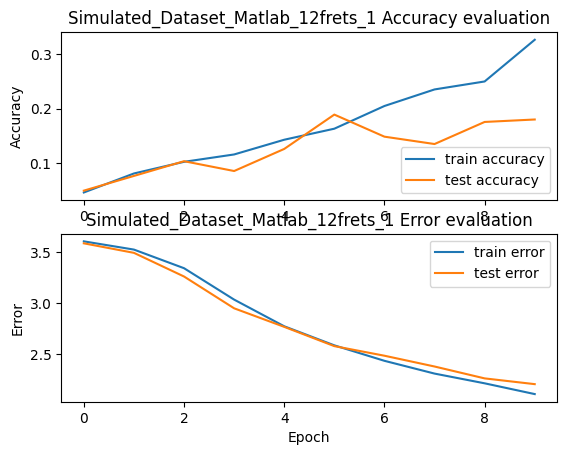

In [137]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                    batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[callback])

# plot accuracy/error for training and validation
plot_history(history, plt_title=PLOT_TITLE)

In [138]:
predicted_index, pred = predict(model, X_test, y_test)

cm = confusion_matrix(y_test, predicted_index)

In [140]:
# calculate metrics
report = classification_report(y_test, predicted_index, zero_division=0, target_names=LABELS)

In [141]:
accuracy = accuracy_score(y_test, predicted_index)
precision_macro = precision_score(y_test, predicted_index, average="macro", zero_division=0)
precision_micro = precision_score(y_test, predicted_index, average="micro", zero_division=0)
recall_macro = recall_score(y_test, predicted_index, average="macro", zero_division=0)
recall_micro = recall_score(y_test, predicted_index, average="micro", zero_division=0)
f1_score_macro = f1_score(y_test, predicted_index, average="macro", zero_division=0)
f1_score_micro = f1_score(y_test, predicted_index, average="micro", zero_division=0)

print("Accuracy: ", accuracy)
print("Precsion macro: ", precision_macro)
print("Precsion micro: ", precision_micro)
print("Recall macro: ", recall_macro)
print("Recall micro: ", recall_micro)
print("F1 score macro: ", f1_score_macro)
print("F1 score micro: ", f1_score_micro)
print(report)

Accuracy:  0.20270270270270271
Precsion macro:  0.13543616959224947
Precsion micro:  0.20270270270270271
Recall macro:  0.22749502749502748
Recall micro:  0.20270270270270271
F1 score macro:  0.13822614042919304
F1 score micro:  0.20270270270270271
              precision    recall  f1-score   support

         A#2       0.00      0.00      0.00        11
         A#3       0.14      0.78      0.24         9
         A#4       0.09      0.83      0.16         6
          A2       0.40      0.18      0.25        11
          A3       0.00      0.00      0.00        12
          A4       0.00      0.00      0.00        11
          B2       0.36      0.45      0.40        11
          B3       0.00      0.00      0.00        13
          B4       0.00      0.00      0.00        11
         C#3       0.17      0.25      0.20         8
         C#4       0.57      0.53      0.55        15
         C#5       0.00      0.00      0.00        12
          C3       0.47      0.70      0.56     

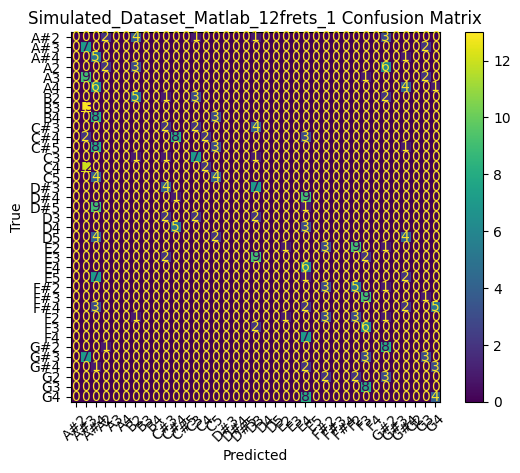

In [142]:
 # plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot(xticks_rotation=45)
plt.title(PLOT_TITLE + " Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()